In [2]:

!pip install mlxtend

In [3]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [6]:
df = pd.read_csv('/content/drive/MyDrive/CMPE255/synthetic_retail_transactions_ohe.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,InvoiceNo,Apple,Banana,Cherry,Dates,Eggs
0,1000,1,1,0,1,1
1,1001,0,1,1,0,0
2,1002,0,1,0,0,0
3,1003,0,0,0,0,1
4,1004,0,0,1,0,0
...,...,...,...,...,...,...
481,1495,1,1,0,0,1
482,1496,0,0,1,1,1
483,1497,0,1,0,0,1
484,1498,1,1,0,1,1


In [12]:
df = df.drop(columns=['InvoiceNo'], errors='ignore')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [13]:
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Apple,Banana,Cherry,Dates,Eggs
0,1,1,0,1,1
1,0,1,1,0,0
2,0,1,0,0,0
3,0,0,0,0,1
4,0,0,1,0,0
...,...,...,...,...,...
481,1,1,0,0,1
482,0,0,1,1,1
483,0,1,0,0,1
484,1,1,0,1,1


In [14]:
from mlxtend.frequent_patterns import apriori

# Minimum support can be adjusted based on your dataset and requirements.
min_support = 0.05
frequent_itemsets = apriori(df, min_support=min_support, use_colnames=True)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [15]:
from mlxtend.frequent_patterns import association_rules

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [16]:
filtered_rules = rules[rules['confidence'] > 0.8]
print(filtered_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


Empty DataFrame
Columns: [antecedents, consequents, support, confidence, lift]
Index: []


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [17]:
rules_sorted = rules.sort_values(by=['lift', 'confidence'], ascending=[False, False])
print(rules_sorted[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10))


                antecedents              consequents   support  confidence  \
30  (Dates, Banana, Cherry)                  (Apple)  0.065844    0.603774   
41                  (Apple)  (Dates, Banana, Cherry)  0.065844    0.134454   
49                  (Apple)   (Eggs, Banana, Cherry)  0.072016    0.147059   
42   (Eggs, Banana, Cherry)                  (Apple)  0.072016    0.555556   
33          (Dates, Cherry)          (Banana, Apple)  0.065844    0.283186   
38          (Banana, Apple)          (Dates, Cherry)  0.065844    0.260163   
36          (Dates, Banana)          (Cherry, Apple)  0.065844    0.296296   
35          (Cherry, Apple)          (Dates, Banana)  0.065844    0.248062   
54    (Dates, Eggs, Cherry)                  (Apple)  0.063786    0.543860   
59                  (Apple)    (Dates, Eggs, Cherry)  0.063786    0.130252   

        lift  
30  1.232916  
41  1.232916  
49  1.134454  
42  1.134454  
33  1.118929  
38  1.118929  
36  1.116279  
35  1.116279  
54  1.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


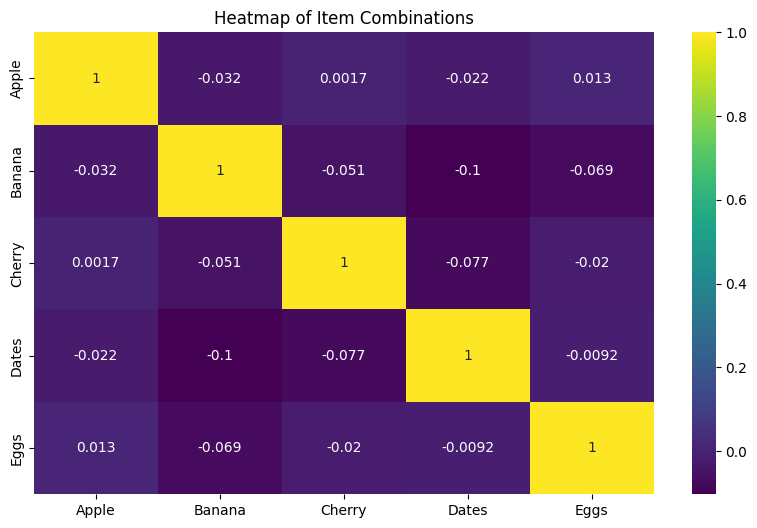

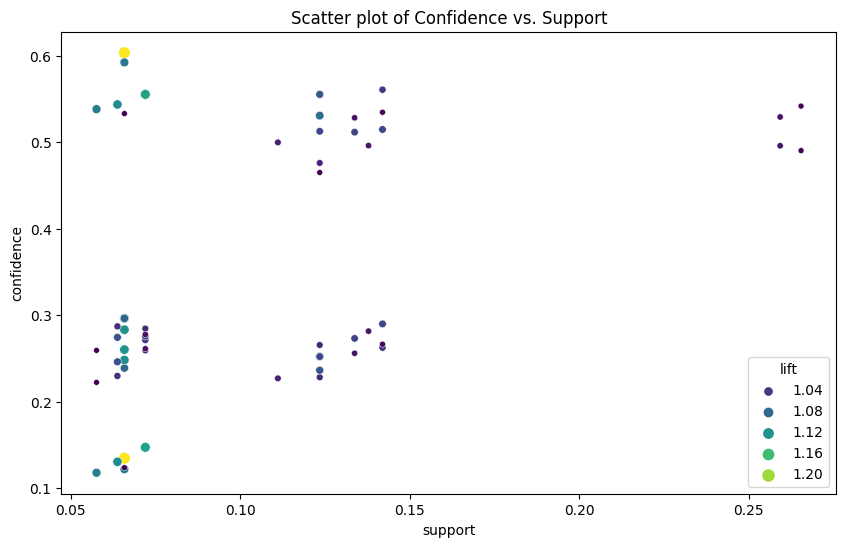

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Heatmap (based on support)
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='viridis')
plt.title('Heatmap of Item Combinations')
plt.show()

# Scatter plot of confidence vs. support
plt.figure(figsize=(10, 6))
sns.scatterplot(x="support", y="confidence", data=rules, hue="lift", size="lift", palette="viridis")
plt.title('Scatter plot of Confidence vs. Support')
plt.show()


In [20]:
rules_pruned = rules[rules['antecedents'].apply(lambda x: len(x) > 1)]
print(rules_pruned[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


                antecedents       consequents   support  confidence      lift
4          (Banana, Cherry)           (Apple)  0.141975    0.514925  1.051486
5           (Cherry, Apple)          (Banana)  0.141975    0.534884  1.003681
6           (Banana, Apple)          (Cherry)  0.141975    0.560976  1.036632
10          (Dates, Banana)           (Apple)  0.111111    0.500000  1.021008
12           (Eggs, Banana)           (Apple)  0.133745    0.511811  1.045127
13          (Banana, Apple)            (Eggs)  0.133745    0.528455  1.011139
16          (Dates, Cherry)           (Apple)  0.123457    0.530973  1.084257
17          (Cherry, Apple)           (Dates)  0.123457    0.465116  1.000206
18           (Dates, Apple)          (Cherry)  0.123457    0.555556  1.026616
22           (Eggs, Cherry)           (Apple)  0.137860    0.496296  1.013445
24            (Dates, Eggs)           (Apple)  0.123457    0.512821  1.047188
25           (Dates, Apple)            (Eggs)  0.123457    0.555

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [21]:
def suggest_products(basket, rules):
    """Suggest products based on the contents of the basket and the association rules."""
    suggestions = set()
    for index, rule in rules.iterrows():
        if rule['antecedents'].issubset(basket):
            suggestions = suggestions.union(rule['consequents'])
    return suggestions - set(basket)

#Example
basket = {'Apple', 'Banana'}
suggested_items = suggest_products(basket, rules_sorted)
print(f"Suggested items for {basket}: {suggested_items}")


Suggested items for {'Banana', 'Apple'}: {'Eggs', 'Dates', 'Cherry'}


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
